In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


trainingSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")
validationSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

traingFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")
validationFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")

In [47]:
#trainingSensor["mea_dt"] = trainingSensor["mea_dt"].apply(str)
#trainingSensor["mea_dt"]  = trainingSensor["mea_dt"].str.slice(start=0, stop=14)
#traingFood['feed_dt'] = pd.to_datetime(traingFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
#traingFood["feed_dt"]=traingFood["feed_dt"].apply(str)
#traingFood["feed_dt"]  = traingFood["feed_dt"].str.slice(start=0, stop=14)

#validationSensor["mea_dt"] = validationSensor["mea_dt"].apply(str)
#validationSensor["mea_dt"]  = validationSensor["mea_dt"].str.slice(start=0, stop=14)
#validationFood['feed_dt'] = pd.to_datetime(validationFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
#validationFood["feed_dt"] = validationFood["feed_dt"].apply(str)
#validationFood["feed_dt"] = validationFood["feed_dt"].str.slice(start=0, stop=14)

In [48]:
trainingSensor.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma
0,0,1,1,2021-07-15 19:03:53,8.8,30.3,5.28,160.0,14.6,0.0,4.0
1,1,1,2,2021-07-15 19:03:53,7.3,32.2,5.23,334.6,0.5,0.0,4.1
2,2,1,3,2021-07-15 19:03:53,7.3,32.0,5.97,325.6,0.6,0.0,4.0
3,3,1,4,2021-07-15 19:03:53,6.9,30.8,5.71,135.0,20.5,0.0,4.0
4,4,1,5,2021-07-15 19:03:53,10.4,28.4,4.54,135.0,18.3,0.0,4.0


In [49]:
#traing = pd.merge(left = trainingSensor, right = traingFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#traing = pd.merge(left = trainingSensor, right = traingFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#traing = traing.dropna(axis=0)
#traing.head()

In [50]:
#validation = pd.merge(left = validationSensor, right = validationFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = pd.merge(left = validationSensor, right = validationFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = validation.dropna(axis=0)
#validation.head()

In [51]:
#traing = traing[traing['tank_id']==2]
#validation = validation[validation['tank_id']==2]

In [52]:

#traing = traing[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
#validation = validation[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
#traing = traing.fillna(0)
#validation = validation.fillna(0)

In [53]:
trainingSensor = trainingSensor.set_index('mea_dt')
trainingSensor.head()

,Unnamed: 0,farm_id,tank_id,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma
mea_dt,,,,,,,,,,
2021-07-15 19:03:53,0,1,1,8.8,30.3,5.28,160.0,14.6,0.0,4.0
2021-07-15 19:03:53,1,1,2,7.3,32.2,5.23,334.6,0.5,0.0,4.1
2021-07-15 19:03:53,2,1,3,7.3,32.0,5.97,325.6,0.6,0.0,4.0
2021-07-15 19:03:53,3,1,4,6.9,30.8,5.71,135.0,20.5,0.0,4.0
2021-07-15 19:03:53,4,1,5,10.4,28.4,4.54,135.0,18.3,0.0,4.0


In [68]:
#x = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = traing[['do_mg']]
x_train = trainingSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
y_train = trainingSensor[['do_mg']]
x_test = validationSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
y_test = validationSensor[['do_mg']]
#x_train = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
#y_train = traing[['do_mg']]
#x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
#y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [69]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)
x_train_t = min_max_scaler.transform(x_train)
x_train = pd.DataFrame(x_train_t, columns=x_train.columns, index=list(x_train.index.values))

In [56]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#std_scaler.fit(x_train)
#x_train = std_scaler.transform(x_train)

In [71]:
# shape확인
nCar = x_train.shape[0] # 데이터 개수
nVar = x_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_train.shape[0] # 데이터 개수
nVar = y_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
nCar = x_test.shape[0] # 데이터 개수
nVar = x_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_test.shape[0] # 데이터 개수
nVar = y_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1113748 nVar: 6
nCar: 1113748 nVar: 1
nCar: 1113748 nVar: 6
nCar: 1113748 nVar: 1


In [73]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
rf_run.fit(x_train, y_train.values.ravel())

#의사결정
dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
dt_model.fit(x_train, y_train.values.ravel())

#그래디언트
gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
gb_model.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [74]:
# train rmse
rf_train_predict = rf_run.predict(x_train)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_train_predict, y_train))) )
 
# validation rmse
rf_valid_predict = rf_run.predict(x_test)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))) )

# train rmse
dt_train_predict = dt_model.predict(x_train)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_train_predict, y_train))) )
 
# validation rmse
dt_valid_predict = dt_model.predict(x_test)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))) )

# train rmse
gb_train_predict = gb_model.predict(x_train)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_train_predict, y_train))) )
 
# validation rmse
gb_valid_predict = gb_model.predict(x_test)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))) )
 
# test rmse
#RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
#a11 = RUN_T.iloc[:, :-1]
#b11 = RUN_T.iloc[:, -1]
#rf_run_predict = rf_run.predict(a11)
#print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

rf_RMSE':1.6325916688334987
rf_RMSE':2.804218840693409
dt_RMSE':1.64546258192787
dt_RMSE':2.7974245489913936
gb_RMSE':1.3498453268688346
gb_RMSE':2.37327924440889


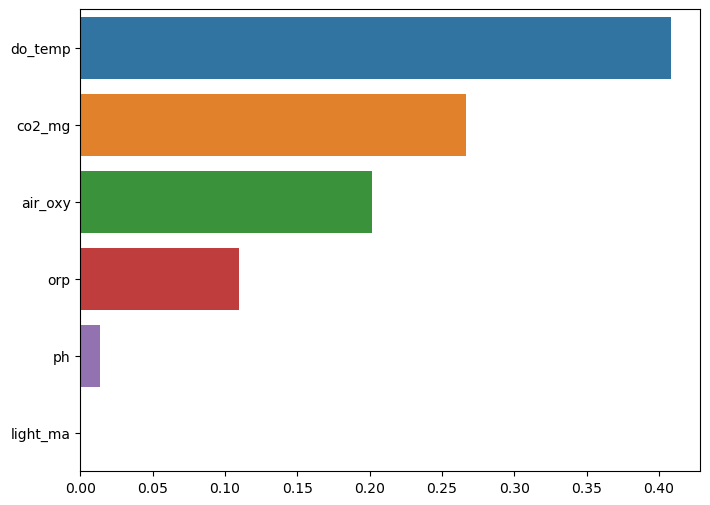

In [75]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

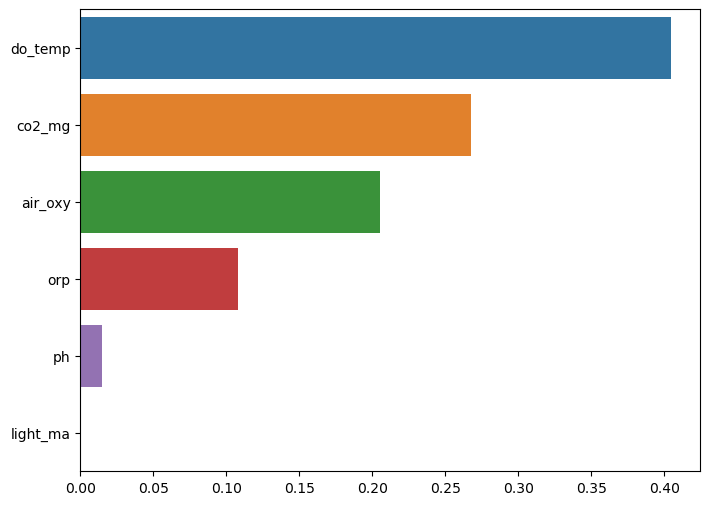

In [76]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

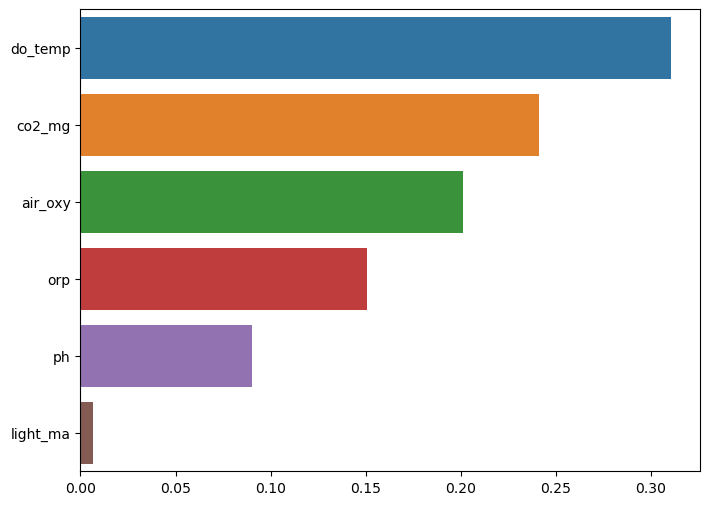

In [77]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

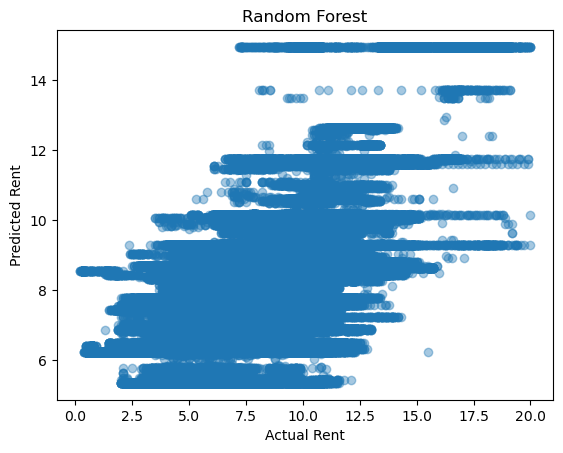

In [78]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, rf_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Random Forest")
plt.show()

In [84]:
print(rf_run.score(x_train, y_train))

print(rf_run.score(x_test, y_test))

0.40608801050384014
-0.7522285266341395


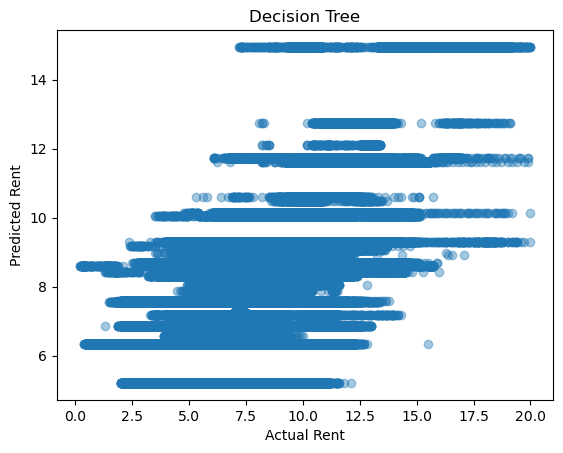

In [79]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, dt_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Decision Tree")
plt.show()

In [82]:
print(dt_model.score(x_train, y_train))

print(dt_model.score(x_test, y_test))

0.39668661257290916
-0.7437479264924349


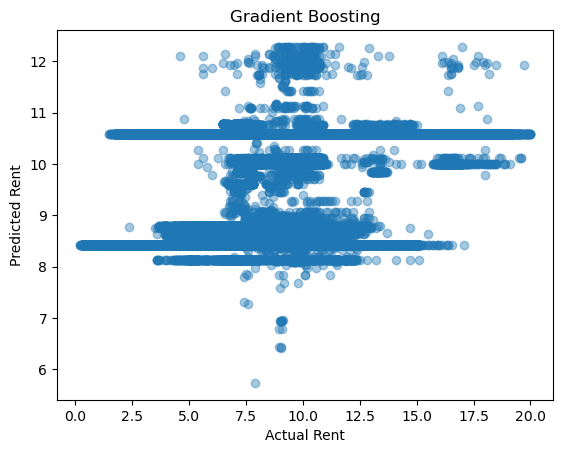

In [80]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [81]:
print(gb_model.score(x_train, y_train))

print(gb_model.score(x_test, y_test))

0.5939916593298096
-0.25506038877987436


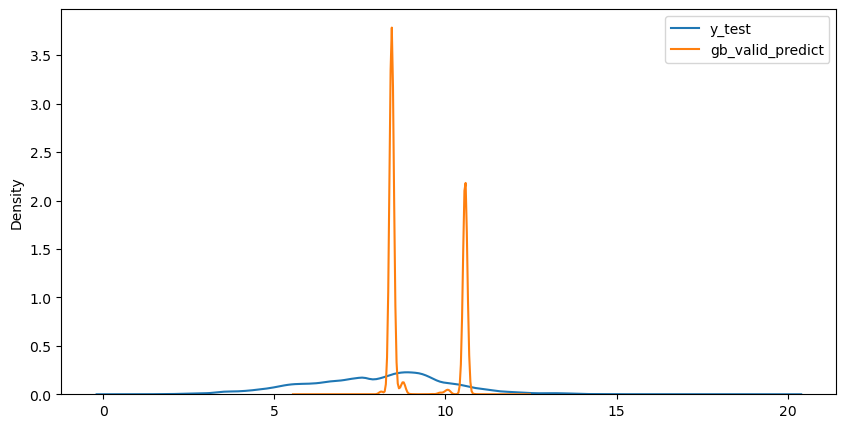

In [85]:
import seaborn as sns

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(gb_valid_predict, label="gb_valid_predict", ax=ax1)
plt.legend()
plt.show()

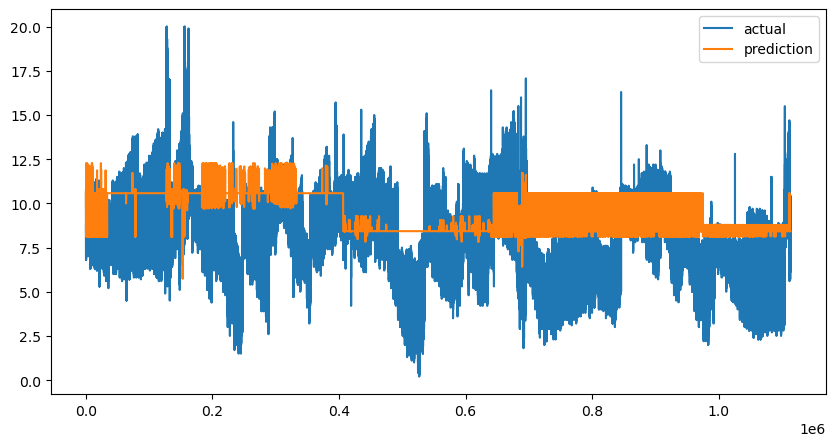

In [86]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(validationSensor.index, y_test, label = 'actual')
plt.plot(validationSensor.index, gb_valid_predict, label = 'prediction')
plt.legend()
plt.show()